In [28]:
import seaborn as sns #% matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_iris


In [29]:
# Load the data 
file_path = 'C:\Employer_Rate.xlsx'
data = pd.read_excel(file_path, sheet_name="RATINGS")

<>:2: SyntaxWarning: invalid escape sequence '\E'
<>:2: SyntaxWarning: invalid escape sequence '\E'
C:\Users\Anshika Singh\AppData\Local\Temp\ipykernel_16116\457226403.py:2: SyntaxWarning: invalid escape sequence '\E'
  file_path = 'C:\Employer_Rate.xlsx'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   COMPANY                    114 non-null    object 
 1   Work life Balance          114 non-null    float64
 2   Company Culture            114 non-null    float64
 3   Skill Development          114 non-null    float64
 4   Job Security               114 non-null    float64
 5   Salary & Benefits          114 non-null    float64
 6   Work satisfaction          114 non-null    float64
 7   Promotions/Appraisal       114 non-null    float64
 8   Overall rating             112 non-null    float64
 9   Management                 113 non-null    float64
 10  No.of review               112 non-null    float64
 11  recommend to a friend      113 non-null    float64
 12  positive business outlook  113 non-null    float64
 13   approvral of CEO          108 non-null    float64

<Axes: >

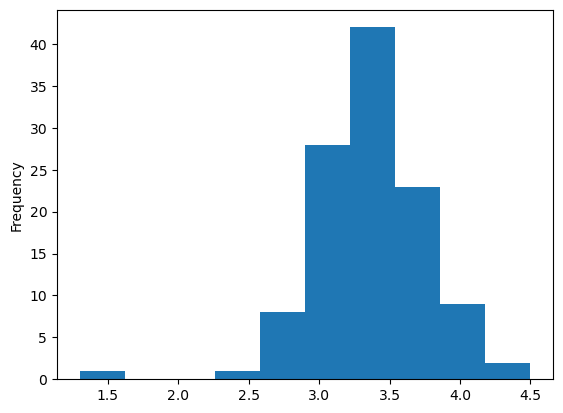

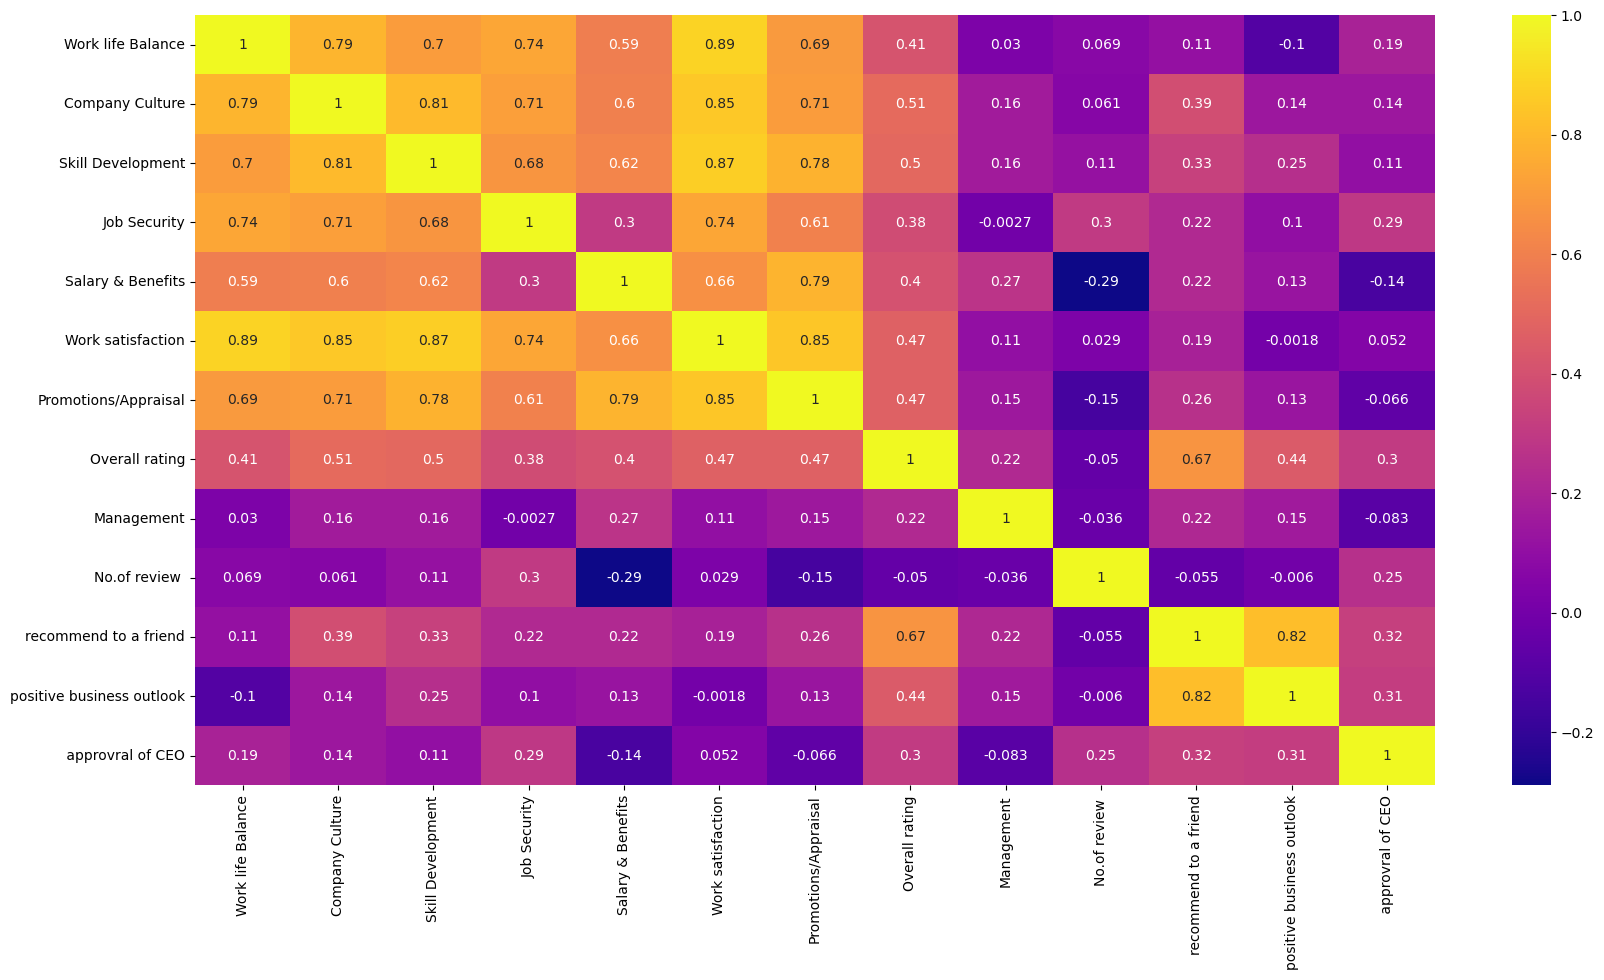

In [30]:
data.head()
data.head(n=10)
data.describe()
data.info()

#data.corr(method='pearson',numeric_only=True)
#distribution about our data





#correlation 
import seaborn as sns
import matplotlib.pyplot as plt

numcols['Work satisfaction'].plot(kind='hist')


plt.figure(figsize=(20,10))
numcols = data.select_dtypes(include=np.number)

sns.heatmap(numcols.corr(), annot=True, cmap="plasma")   
#numcols['Work satisfaction'].plot(kind='hist')

In [31]:
#data post clean up
# Fill missing values with the mean
data_filled = data.fillna(data.mean(numeric_only=True))
for col in numcols.columns:
    numcols[col]=numcols[col].fillna(numcols[col].median())

In [32]:
# Drop the 'COMPANY' column, as it's non-numeric and won't be used for clustering
X = data_filled.drop(columns=['COMPANY'])
# Standardize the features scaler = StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\Anshika Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Anshika Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1
 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1
 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0
 0 0 1]


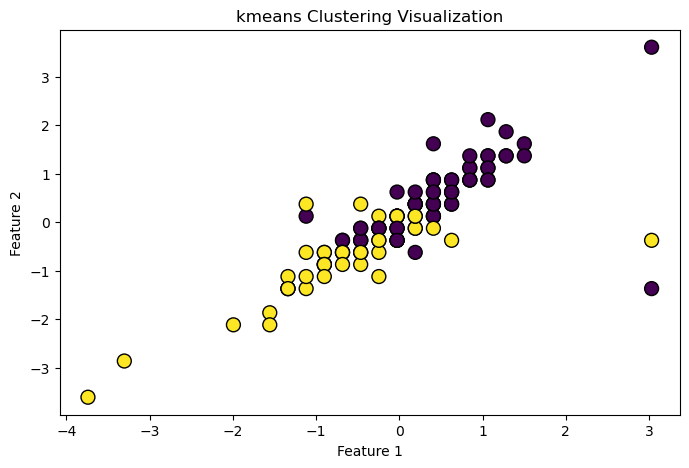

In [33]:
# Apply K-means clustering with 2 clusters - Because we need to bifurcate the Organisations into 2 groups - Employee friendly and not so employee friendly
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(X_scaled)
# Apply K-means clustering with 2 clusters - Because we need to bifurcate the Organisations into 2 groups - Employee friendly and not so employee friendly
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(X_scaled)
print(clusters)
# Visualize the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=100, edgecolors='black')
plt.title('kmeans Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [34]:
# Add the cluster labels to the data
data_filled['Cluster'] = clusters

In [35]:
# Define "good" and "bad" companies based on clusters
data_filled['Company Type'] = data_filled['Cluster'].apply(lambda x: 'Good' if x == 1 else 'Bad')

In [36]:
# Preparing data for supervised learning 
# Using Overall rating as target for classification
X = data_filled.drop(columns=['COMPANY', 'Cluster', 'Company Type']) 
y = data_filled['Company Type'].apply(lambda x: 1 if x == 'Good' else 0)

In [37]:
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# Predict and evaluate 
y_pred = clf.predict(X_test) 

print("Accuracy:", accuracy_score(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

Accuracy: 0.9714285714285714
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.95      0.97        19

    accuracy                           0.97        35
   macro avg       0.97      0.97      0.97        35
weighted avg       0.97      0.97      0.97        35



In [40]:
# View the classification results for each company
print(data_filled[['COMPANY', 'Company Type']]) 

                      COMPANY Company Type
0                      Zensar          Bad
1                    Lenskart         Good
2                       Ramco         Good
3                      Dimagi          Bad
4                       Wipro          Bad
..                        ...          ...
109                       Ola         Good
110                  Cardekho          Bad
111  Ness Digital Engineering          Bad
112                  Cloudera          Bad
113                 Unacademy         Good

[114 rows x 2 columns]


In [41]:
# Optional: Save the cleaned data with classifications
cleaned_file_path = 'Cleaned_Unofficial_with_Classification2.xlsx'
data_filled.to_excel(cleaned_file_path, index=False)
print(f"Cleaned data saved as {cleaned_file_path}")

Cleaned data saved as Cleaned_Unofficial_with_Classification2.xlsx
